# Bifurcation diagram for the tent map

We started the notebook server using 'ipython notebook' and clicked on 'New Notebook'. We did not load matplotlib, but we do it now (this is the recomended procedure):

In [1]:
%matplotlib inline

The option 'inline' will show the plots within the notebook instead of opening a separate window.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Definition of the tent map

The tent map is a seamingly simple discrete map, 
$$ \begin{array}{ll}
x_{n+1} = 2 \alpha x_n & \text{for } 0<x<1/2 \\
x_{n+1} = 2 \alpha \left(1-x_n\right) & \text{for } 1/2 < x <1
\end{array}$$

In [3]:
def tent(x):
    return np.minimum(x, 1-x)

This definition works for any value of $\alpha$, and works for arrays of x-values. I know define a map that given an array x, containining the initial value in the first element, fills in the array with the iterations of the tent map. The array x is two dimensional: the rows correspond to different values of alpha, and the columns are the iterations.

In [4]:
def tentarray(x, alpha):
    for i in range(np.shape(x)[1]-1):
        x[:,i+1] = 2 * alpha * tent(x[:,i])
        

#### Chaotic behaviour of the map

Let us plot the first 20 iterations for $\alpha = 0.4$ and $\alpha=0.7$ with the initial value $x_1=0.2$:

In [5]:
x=np.zeros((2,20))

In [6]:
x[:,0]=0.2

In [7]:
alpha=np.array([0.4,0.7])

In [8]:
tentarray(x,alpha)

Text(0.5, 1.0, '$\\alpha=0.4$')

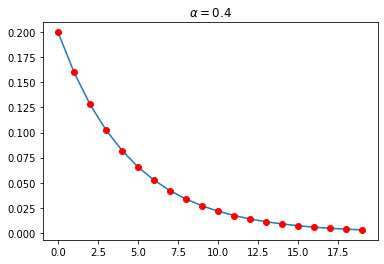

In [9]:
plt.plot(x[0])
plt.plot(x[0],'or')
plt.title(r"$\alpha=0.4$")

Text(0.5, 1.0, '$\\alpha=0.7$')

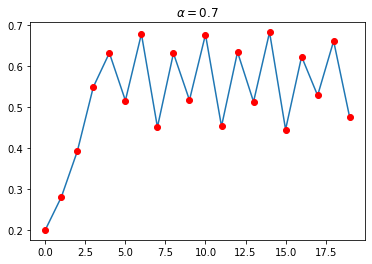

In [10]:
plt.plot(x[1])
plt.plot(x[1],'or')
plt.title(r"$\alpha=0.7$")

The tent map does not show chaotic behaviour for $\alpha=0.4$, since it clearly approaches the assymptotic value $x_\infty=0$. In contrast, for $\alpha=0.7$, the behaviour is non-steady and chaotic, although it is hard to draw conclusions from just the first 20 iterations.

#### Fixed Points

We can understand the dynamics of the tent map by studying its fixed points. Remember that a fixed point, $x^* $, is mapped onto itself: 
$$x_n = x^* \Rightarrow x_{n+1} = x^*$$.

It is clear that $x=0$ is a fixed point of the tent map regardless of the value of $\alpha$. However, it is only an attractor if $\alpha=1/2$, otherwise the origin is unstable.

If $\alpha=1/2$, all values of $x\leq 1/2$ are fixed points. There is another unstable fixed point, besides the origin, if $\alpha>1/2$:
$$ x^* = \frac{2 \alpha}{2 \alpha + 1},$$
which is greater than $1/2$ and corresponds to the $1-x_n$ branch of the tent map. It is unstable: a value of $x$ close to it will move away from it as the following plot showing a few iterations of the $\alpha=0.7$ case for an initial value close (but not equal) to its fixed point at $1.4/2.4$ demonstrates:

In [11]:
x[:,0]=1.39/2.4

In [12]:
alpha=np.array([0.4,0.7])

In [13]:
tentarray(x,alpha)

Text(0.5, 1.0, '$\\alpha=0.7, \\; x_0=0.933$')

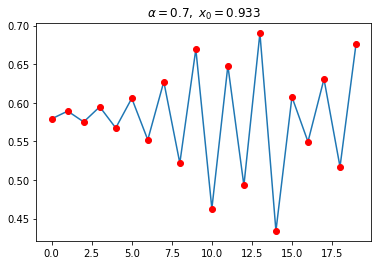

In [14]:
plt.plot(x[1])
plt.plot(x[1],'or')
plt.title(r"$\alpha=0.7, \; x_0=0.933$")

#### Simple bifurcation diagram

To make the bifurcation diagram we should vary the value of $\alpha$ within its allowed range $0<\alpha<1$, and iterate the map for each choice of $\alpha$. It is important to discard the first few iterations to make sure that the system is stabilized. The horizontal axis represents the parameter $\alpha$, and the vertical axis is the $x$ variable.

In [15]:
def thermalize(n, xo, alpha):
    x1 = xo * np.ones(len(alpha))
    for i in range(n):
        x2 = 2.*alpha*tent(x1)
        x1 = x2
    return x1

def simplebif(initial=0.2, discard=20, stepalpha=0.1, numx=20):
    alpha = np.arange(stepalpha,1,stepalpha)
    x = np.zeros((len(alpha), numx))
    x[:,0] = thermalize(discard, initial, alpha)
    tentarray(x, alpha)
    return x


The function 'simplebif' above achieves that. Note how we can define default parameters for the variables of a function. The following two commands have the same result.

In [16]:
x = simplebif(0.2,20,0.1,20)

In [17]:
x = simplebif()

([<matplotlib.axis.XTick at 0x1143f9690>,
 <a list of 3 Text xticklabel objects>)

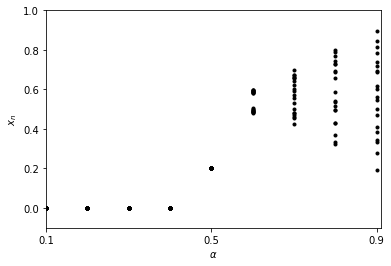

In [18]:
plt.plot(x,'.k')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_n$")

plt.axis([0,np.shape(x)[0] - 0.9, -0.1,1])

alpha = np.arange(0.1,1,0.1)
xt = [0, 4, 8]
plt.xticks(xt,alpha[xt])

Simple bifurcation diagram for the tent map with $\Delta \alpha = 0.1 $, showing the iterations $n = 20-30$

Note how the system enters a chaotic regime for $\alpha > 1/2$. Although the orbits are chaotic, they are bounded within a subset of the interval $[0,1]$. The stable fixed points for $\alpha < 1/2$ stand out clearly. 

<strong>Exercise:</strong> To check if the map is stabilized, compare the plot above to the case where the first 200 iterations are discarded. If the plot is significantly different, you should probably increase the thermalization phase. But, before you do that, plot also the biffurcation diagram keeping more values of the series after stabilization, since for large values of $\alpha$, some of the gaps might be due to not plotting enough values.

(11, 200)


([<matplotlib.axis.XTick at 0x1144adbd0>,
 <a list of 3 Text xticklabel objects>)

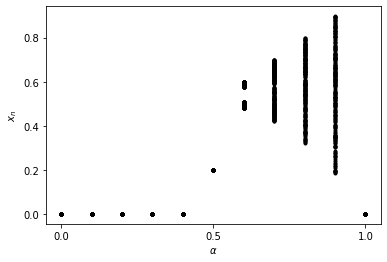

In [19]:
def r_simplebif(initial=0.2, discard=20, stepalpha=0.1, numx=20, alphamin=0, alphamax= 1):
    alpha = np.arange(alphamin , alphamax + stepalpha , stepalpha)
    x = np.zeros((len(alpha), numx))
    x[:,0] = thermalize(discard, initial, alpha)
    tentarray(x, alpha)
    return x

x = r_simplebif(0.2,200,0.1,200,0,1)
print(x.shape)
plt.plot(x,'.k')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_n$")

alpha = np.arange(0,1.1,0.1)
xt = [0, 5, 10]
plt.xticks(xt,alpha[xt])

<strong>Exercise:</strong> For $\alpha=0.6$, there seem to be two spots and a gap in between. Produce a finer sampling, $\Delta \alpha=0.01$ and show the iterations $n=1,000-1,999$. You might have to reduce the dot size to be able to see different regions.

([<matplotlib.axis.XTick at 0x114d5c7d0>,
 <a list of 3 Text xticklabel objects>)

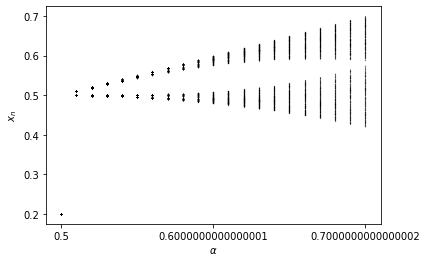

In [20]:
x = r_simplebif(0.2,1000,0.01,1000,0.5,0.7)
plt.plot(x,'.k',markersize = 0.1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_n$")

alpha = np.arange(0.5,0.71,0.01)
xt = [0, 10, 20]
plt.xticks(xt,alpha[xt])

From now on, we can focus on the interesting region where the chaotic behaviour ensues (i.e. forgetting about the region with stable fixed points):

At this point, increasing the number of points would not add any further information. It is clear that for values of $\alpha$ approaching $1$, the tent map covers all the range $(0,1)$. So, if we perform enough iterations, the tent map will take any value in this interval. A subtle question, is whether all the $y$-range is sampled evenly. Maybe the tent map does not get close to the edges as often as to the central region? To answer this question we can pixelize the image, and plot the density of points for each pixel. This is what is shown in the <a href=https://en.wikipedia.org/wiki/Tent_map> Wikipedia </a> entry.

<strong>Exercise:</strong> Let's reproduce it step by step. First generate points in the interesting region $1/2 < \alpha < 1$, using a very fine stepping of $\Delta \alpha = 0.0005$ and discarding the first $1000$ iterations.

In [21]:
x = r_simplebif(0.2,1000,0.0005,100000,0.5,1)

In [22]:
x.shape

(1001, 100000)

You should now have a matrix that contains $100000$ iterations for a particular $\alpha$. 

Now create a matrix which has 1000 rows and 1000 columns that will contain the pixels. The columns will contain the number of points that fall within (0, 0.001), (0.001, 0.002) and so on between $[0,1]$. You can use the numpy function 'histogram' for this purpose. Display the matrix using 'plt.imshow(y.transpose())', where y is the new matrix.

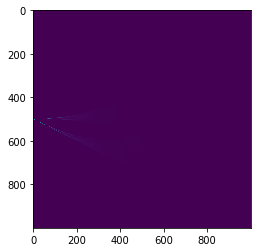

In [23]:
y = np.zeros((1000,1000))
for i in range(1000):
    y[i,:],k = np.histogram(x[i,:],bins= np.arange(1001)*0.001)
plt.imshow(y.transpose())

It is hard to see anything, because the range is too large. We will generate a more sensible matrix to plot.

Multiply each row, corresponding to a particular value of $\alpha$ by the number of pixels that are non-zero, this avoids giving too much weight to the few pixels in the low $\alpha$ region as compared to the more spread out sampling around $\alpha \approx 1$. Note how powerful the index operations can be. 

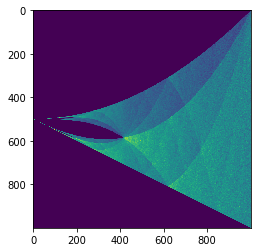

In [24]:
def count_nonzero(a):
    count = 0
    for x in a:
        if x != 0:
            count += 1
    return count
for i in range(1000):
    y[i,:] = y[i,:] * count_nonzero(y[i,:])


plt.imshow(y.transpose())


You can now use 'imshow' again with this renormalized matrix. If you pick a gray colormap (option cmap=cm.gray_r), a darker color corresponds to higher probability for $x_n$ to be equal to that value. We can clearly see the onset of period doubling at $\alpha \sim 1/2$ and the chaotic behaviour for larger values of $\alpha$. In fact, if we maximize the region around $\alpha \approx 1/2$ we will be able to see four separate regions corresponding to additional period doublings (we could see more of them if we zoomed even more).

Text(0, 0.5, '$x_n$')

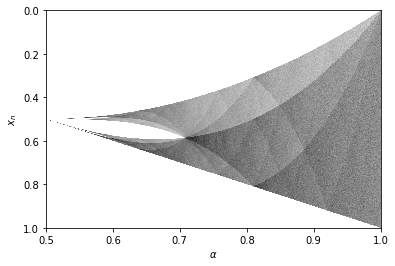

In [25]:
plt.imshow(y.transpose(), cmap='gray_r',extent=[0.5, 1, 1, 0], aspect='auto')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_n$")
